Epoch [100/1000], Loss: 0.37277209758758545
Epoch [200/1000], Loss: 0.33730340003967285
Epoch [300/1000], Loss: 0.30766284465789795
Epoch [400/1000], Loss: 0.28266701102256775
Epoch [500/1000], Loss: 0.26139795780181885
Epoch [600/1000], Loss: 0.2431410402059555
Epoch [700/1000], Loss: 0.22733807563781738
Epoch [800/1000], Loss: 0.21355104446411133
Epoch [900/1000], Loss: 0.2014341652393341
Epoch [1000/1000], Loss: 0.19071218371391296


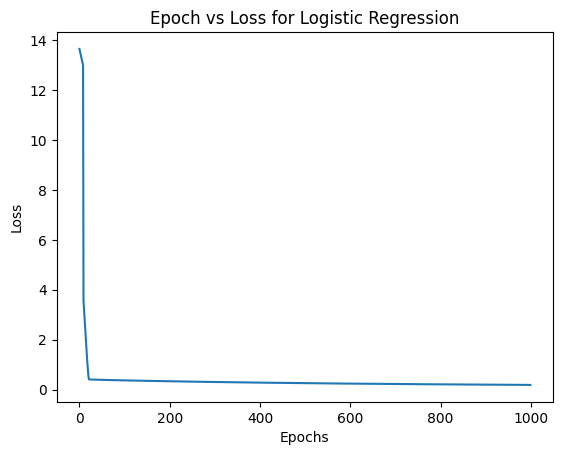

Final Weight: 0.06885924190282822
Final Bias: -1.9476704597473145
Prediction for X = 30: 0.5294924378395081


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        
        self.linear = nn.Linear(1, 1)  
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))  

x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)  
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)  


model = LogisticRegressionModel()


criterion = nn.BCELoss()


optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000

losses = []


for epoch in range(epochs):
   
    y_pred = model(x)
    
    
    loss = criterion(y_pred, y)
    
    
    optimizer.zero_grad() 
    loss.backward()  
    
    
    optimizer.step()
    
    
    losses.append(loss.item())
    
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")


plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss for Logistic Regression')
plt.show()


final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()

print(f"Final Weight: {final_weight}")
print(f"Final Bias: {final_bias}")



X_test = torch.tensor([[30.0]], dtype=torch.float32)
y_test_pred = model(X_test)

print(f"Prediction for X = 30: {y_test_pred.item()}")
